In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv("C:\\AIdata\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
'''
| Pregnancies | 임신 횟수 | 
| Glucose | 혈당 수치 | 
| BloodPressure | 혈압 | 
| SkinThickness | 피부 두께 | 
| Insulin | 인슐린 수치 | 
| BMI | 체질량 지수 (BMI) | 
| DiabetesPedigreeFunction | 당뇨 유전력 함수 | 
| Age | 나이 | 
| Outcome | 결과 (당뇨 여부) | 
'''

'\n| Pregnancies | 임신 횟수 | \n| Glucose | 혈당 수치 | \n| BloodPressure | 혈압 | \n| SkinThickness | 피부 두께 | \n| Insulin | 인슐린 수치 | \n| BMI | 체질량 지수 (BMI) | \n| DiabetesPedigreeFunction | 당뇨 유전력 함수 | \n| Age | 나이 | \n| Outcome | 결과 (당뇨 여부) | \n'

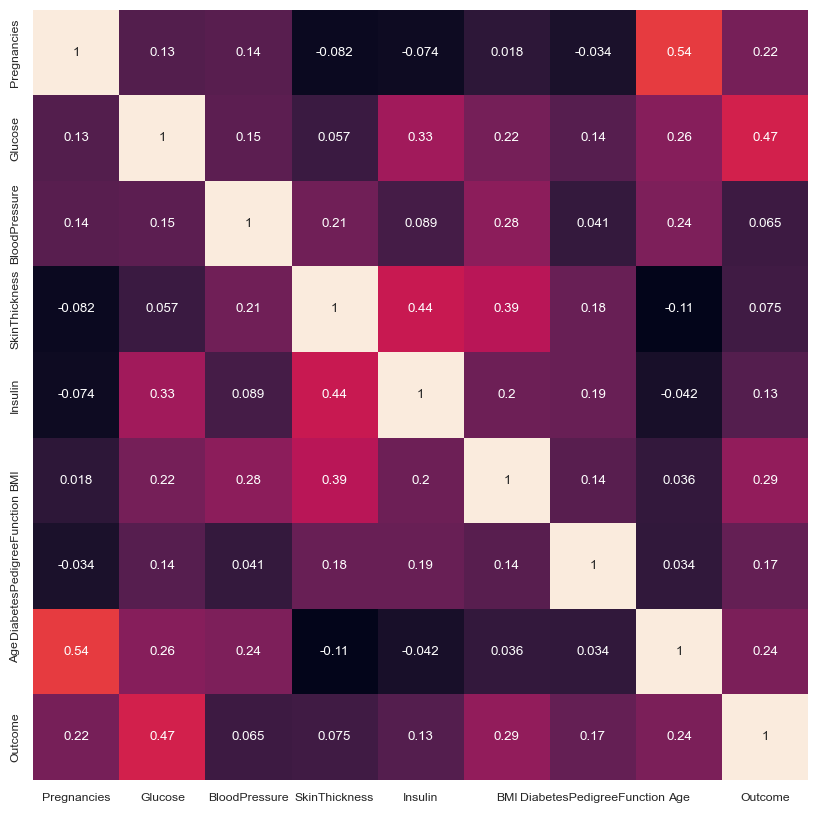

In [7]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# 가장 높은건 glucose

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 원핫 인코딩

In [17]:
Y = pd.get_dummies(y).values

# 딥러닝 입력을 위해 Numpy로 변환

In [18]:
X = X.values

In [19]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 8), (614, 2), (154, 8), (154, 2))

In [52]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Dropout

In [53]:
model = Sequential()

In [54]:
model.add(Dense(64,input_shape=(8,),activation='tanh'))
model.add(Dropout(0.5))  # 드롭아웃 추가
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))  # 드롭아웃 추가
model.add(Dense(16,activation='tanh'))
model.add(Dense(2))

In [55]:
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
#경사 하강법(Gradient Descent)**의 변형,  가중치에 대한 업데이트 양을 조절 
# 각 가중치의 기울기(gradient)에 대해 변화량을 구하고, 그 기울기의 제곱을 이동 평균 방식으로 누적해 저장

#mse 경사 하강법(Gradient Descent)**의 변형
#손실 함수입니다. 이는 모델이 예측한 값과 실제 값의 차이를 제곱한 후, 그 값들의 평균을 구하여 모델의 성능을 평가

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,218 (12.57 KB)

 Trainable params: 3,218 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.9514 - mse: 0.9514 - val_loss: 0.2942 - val_mse: 0.2942
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5523 - mse: 0.5523 - val_loss: 0.2662 - val_mse: 0.2662
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5217 - mse: 0.5217 - val_loss: 0.2385 - val_mse: 0.2385
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4141 - mse: 0.4141 - val_loss: 0.2162 - val_mse: 0.2162
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3550 - mse: 0.3550 - val_loss: 0.2080 - val_mse: 0.2080
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3225 - mse: 0.3225 - val_loss: 0.2028 - val_mse: 0.2028
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3195 - mse: 0.3195 - val_loss: 0.2009 - val_mse: 0.2009
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2829 - mse: 0.2829 - val_loss: 0.2037 - val_mse: 0.2037
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2808 - mse:

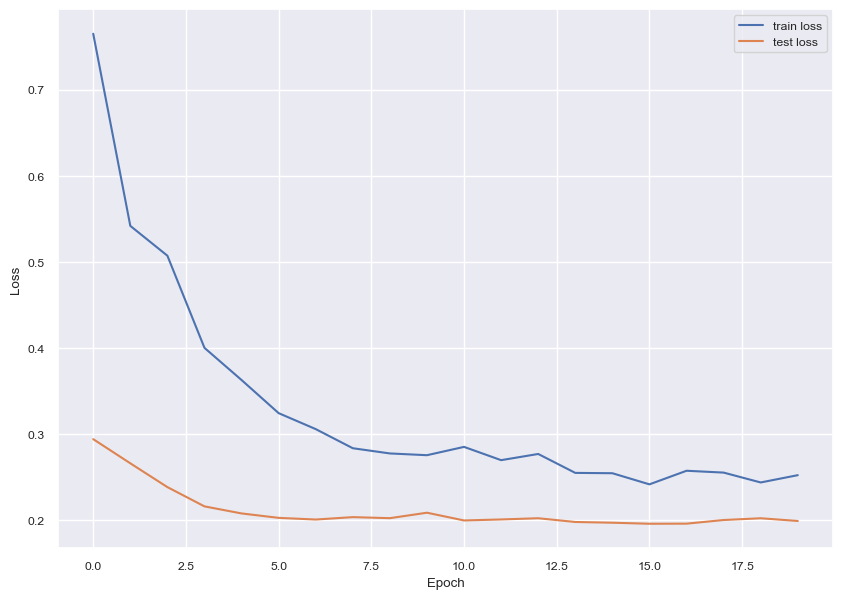

In [58]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1973 - mse: 0.1973 


[0.19920626282691956, 0.19920626282691956]